In [1]:
# Viena užduotis maždaug vienai paskaitai. Techniniai
# reikalavimai – Jupyter Notebook’as arba Streamlit
# aplinka. Grafikai turi turėti pavadinimus, ašys pavadintos
# prasmingai, jei grafike yra daugiau nei viena kreivė – legenda
# būtina. Panaudoti boxplot, swarmplot, heatmap,
# pairplot, (h)bar, histogram, scatter.
# Būtina pasirašyti 1 – 2 sakinius į JupyterNotebook’ą apie
# tai, ką matote, ką galite pasakyti iš grafiko (ką matote grafike,
# 1-2 sakiniai vienam grafikui, tad jei turėsite 10 grafikų – 20
# sakinių).


# 2

# TBC duomenys
# https://data.gov.lt/datasets/2871/

# (tuberkulioze – rūkymas, gėrimas,
# lytis, TLK kodas, mirties data)

# Ar yra priklausomybė tarp gyvenimo
# trukmės ir TBC žalingų įpročių? Pateikite TBC sergančiųjų
# duomenų apžvalgą: pasiskirstymas pagal lytį, amžių,
# rūkymo/alkoholio vart. stažą. Parašykite skriptą, kuris
# prognozuotų tikėtiną paciento gyvenimo trukmę.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import *

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
tub = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/TubPacientoZalingasIprotis.csv')

In [4]:
tub

,_type,_id,_revision,_page.next,paciento_id,paciento_vardas,paciento_pavarde,paciento_gim_data,paciento_asmens_kodas,vda_ak_validacija,...,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d
0,datasets/gov/santara/tub_pacientu_zalingi_ipro...,da2bbb1c-2884-48bc-bdfd-19b27ff97025,76cab5cc-7551-4c30-8df1-537f5c036a5a,NaN,000254ba808ae65,7a0f681b673018a,2a925dd8f6a43f2,cf71c293a267455,2e0500a37929dcc,Tinkamas,...,2.0,11-20 cigarečių per dieną,3.0,11 - 20 metų,1.0,Nevartoja,A15d,A15d,NaN,NaN
1,datasets/gov/santara/tub_pacientu_zalingi_ipro...,eb2639f9-29b6-4d6c-888b-5eb2506dbb19,c3d871f4-5b93-4d88-aaae-0a6e9fe7daf3,NaN,0002a198424b859,d69d675af2a2fef,743a21b9b51c547,565e6a3a976e20a,aa6024f3d69f070,Tinkamas,...,4.0,Nerūko,0.0,NaN,2.0,Vartoja retai,A19.1,A19.1,NaN,NaN
2,datasets/gov/santara/tub_pacientu_zalingi_ipro...,63712b95-d93c-4f25-8e0e-117822d05575,92c2ea5d-851e-4739-a504-da8cf375f0f7,NaN,00043169b1fdc6c,fcd863544e185ea,8d78f1941f5609b,0cf907d261a93b3,97fdc9b065f1ab7,Tinkamas,...,2.0,11-20 cigarečių per dieną,4.0,Virš 20 metų,2.0,Vartoja retai,A15,A15,False,NaN
3,datasets/gov/santara/tub_pacientu_zalingi_ipro...,de235944-0298-49b9-a9cb-28669c44f160,b5a7d3ac-76b2-4c25-8a50-66bb7d7a766c,NaN,000484e8a1387ee,f33bd8003b8283b,da260f7c627cd29,80ccd1882320355,a9f4072abb2d398,Tinkamas,...,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A16,A16,False,NaN
4,datasets/gov/santara/tub_pacientu_zalingi_ipro...,57150a0b-0f48-408c-8ab2-7812e7cb39f0,edac734d-572d-4cbe-8b11-3a727d5c3f9e,NaN,000579c499e4957,437c46e3f493fe6,8eb924fce554593,25b43e589208bc9,158691c02a48664,Tinkamas,...,3.0,Virš 20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A15.1,A15.1,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52128,datasets/gov/santara/tub_pacientu_zalingi_ipro...,a1d5b307-b8da-4868-a61c-f31169c77375,7961f9c7-e12a-46c8-a465-733678758309,NaN,fff470b680dbd61,9d59d26bf42e7ff,710b2ac63404fd3,ca87f227d737ac5,835fd708c8b5d7a,Tinkamas,...,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A15.1d,A15.1d,True,2004-04-10
52129,datasets/gov/santara/tub_pacientu_zalingi_ipro...,32a8569c-fe6b-45ef-9050-98ad5a9f10ae,83863300-c9bd-4602-81e7-c2b1574ca5ff,NaN,fff85dbf9aac42f,95e0bd798db4b64,1e2883c18da0c62,66fd2131f42605c,bc220e118195e11,Netinkamas kontrolinis skaitmuo,...,1.0,Iki 10 cigarečių per dieną,3.0,11 - 20 metų,3.0,Girtauja,A16,A16,False,NaN
52130,datasets/gov/santara/tub_pacientu_zalingi_ipro...,45fd1019-a254-4768-9d02-526f3f387cef,5669cbc5-2746-49c3-9b20-3ca5d3d723b4,NaN,fff996795579760,00a8d7c0a60ac1e,ffa6dbb40ddbfcf,1de50bea52cdc2a,1eb5da798992a8f,Tinkamas,...,4.0,Nerūko,0.0,NaN,3.0,Girtauja,A16,A16,False,NaN
52131,datasets/gov/santara/tub_pacientu_zalingi_ipro...,5f7255df-3a16-4097-a912-b436df7cd65e,ab35895b-0d93-4526-940c-4750a773af87,NaN,fffba6e39104485,490cb1a00aeaba4,43076bc88937b23,3ad6da66e64c810,b04b2d920d22b7d,Tinkamas,...,1.0,Iki 10 cigarečių per dieną,4.0,Virš 20 metų,2.0,Vartoja retai,A16,A16,False,NaN


In [5]:
df_check = tub

In [6]:
df_check = df_check[['paciento_gim_metai', 'paciento_lytis', 'rukymas_id', 'rukymas_reiksme', 'rukymo_stazas_id', 'rukymo_stazas_reiksme', 'alkoholis_id', 'alkoholis_reiksme', 'vda_ligos_kodai', 'ligos_kodas', 'ar_mire_nuo_tub', 'mirties_nuo_tub_d']]

In [7]:
df_analyse = df_check.query('ar_mire_nuo_tub != False')

In [8]:
df_analyse['mirties_nuo_tub_d'] = df_analyse['mirties_nuo_tub_d'].fillna('2025-01-27')
df_analyse['mirties_data'] = pd.to_datetime(df_analyse['mirties_nuo_tub_d'], format='%Y-%m-%d')
df_analyse['gimimo_data'] = pd.to_datetime(df_analyse['paciento_gim_metai'], format='%Y-%m-%d')

In [9]:
df_analyse

,paciento_gim_metai,paciento_lytis,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d,mirties_data,gimimo_data
0,1978-01-01,M,2.0,11-20 cigarečių per dieną,3.0,11 - 20 metų,1.0,Nevartoja,A15d,A15d,NaN,2025-01-27,2025-01-27,1978-01-01
1,1967-01-01,V,4.0,Nerūko,0.0,NaN,2.0,Vartoja retai,A19.1,A19.1,NaN,2025-01-27,2025-01-27,1967-01-01
5,1924-01-01,V,4.0,Nerūko,NaN,NaN,2.0,Vartoja retai,A15,A15,True,2003-05-01,2003-05-01,1924-01-01
6,1994-01-01,V,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A15.1,A15.1,NaN,2025-01-27,2025-01-27,1994-01-01
11,1985-01-01,V,2.0,11-20 cigarečių per dieną,2.0,1 - 10 metų,2.0,Vartoja retai,A16;A15,A15,True,2012-04-14,2012-04-14,1985-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52102,1952-01-01,V,3.0,Virš 20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A15d;A15d,A15d,NaN,2025-01-27,2025-01-27,1952-01-01
52115,1946-01-01,V,3.0,Virš 20 cigarečių per dieną,4.0,Virš 20 metų,4.0,Alkoholikas,A19,A19,True,2001-04-24,2001-04-24,1946-01-01
52122,1953-01-01,V,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A18.1,A18.1,NaN,2025-01-27,2025-01-27,1953-01-01
52126,1935-01-01,M,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A15;A15.1,A15.1,NaN,2025-01-27,2025-01-27,1935-01-01


In [10]:
df_analyse['Amžius'] = df_analyse['mirties_data'].dt.year - df_analyse['gimimo_data'].dt.year

In [11]:
df_analyse

,paciento_gim_metai,paciento_lytis,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d,mirties_data,gimimo_data,Amžius
0,1978-01-01,M,2.0,11-20 cigarečių per dieną,3.0,11 - 20 metų,1.0,Nevartoja,A15d,A15d,NaN,2025-01-27,2025-01-27,1978-01-01,47
1,1967-01-01,V,4.0,Nerūko,0.0,NaN,2.0,Vartoja retai,A19.1,A19.1,NaN,2025-01-27,2025-01-27,1967-01-01,58
5,1924-01-01,V,4.0,Nerūko,NaN,NaN,2.0,Vartoja retai,A15,A15,True,2003-05-01,2003-05-01,1924-01-01,79
6,1994-01-01,V,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A15.1,A15.1,NaN,2025-01-27,2025-01-27,1994-01-01,31
11,1985-01-01,V,2.0,11-20 cigarečių per dieną,2.0,1 - 10 metų,2.0,Vartoja retai,A16;A15,A15,True,2012-04-14,2012-04-14,1985-01-01,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52102,1952-01-01,V,3.0,Virš 20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A15d;A15d,A15d,NaN,2025-01-27,2025-01-27,1952-01-01,73
52115,1946-01-01,V,3.0,Virš 20 cigarečių per dieną,4.0,Virš 20 metų,4.0,Alkoholikas,A19,A19,True,2001-04-24,2001-04-24,1946-01-01,55
52122,1953-01-01,V,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A18.1,A18.1,NaN,2025-01-27,2025-01-27,1953-01-01,72
52126,1935-01-01,M,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A15;A15.1,A15.1,NaN,2025-01-27,2025-01-27,1935-01-01,90


In [12]:
# Ar yra priklausomybė tarp gyvenimo
# trukmės ir TBC žalingų įpročių? Pateikite TBC sergančiųjų
# duomenų apžvalgą: pasiskirstymas pagal lytį, amžių,
# rūkymo/alkoholio vart. stažą. Parašykite skriptą, kuris
# prognozuotų tikėtiną paciento gyvenimo trukmę.

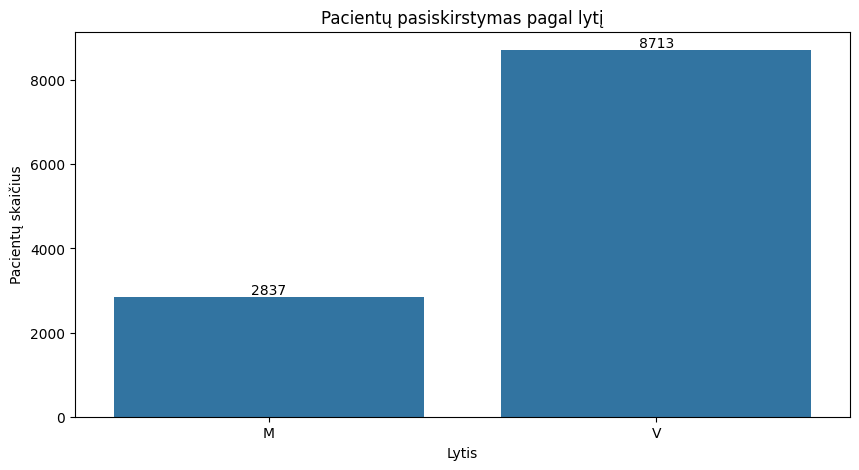

In [13]:
df_for_plot = df_analyse[['paciento_lytis', 'Amžius', 'rukymo_stazas_reiksme', 'alkoholis_reiksme']].groupby('paciento_lytis').count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='paciento_lytis', y='Amžius', data=df_for_plot, ax=ax)
ax.set_title('Pacientų pasiskirstymas pagal lytį')
ax.set_xlabel('Lytis')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [14]:
# Pastebime, kad daugiau sergančiųjų yra moterų nei vyrų
# Skirtumas yra beveik 3 kartus

In [15]:
df_analyse['Amžiaus grupė'] = df_analyse['Amžius'].apply(lambda x: 'Iki 20' if x < 20 else '20-40' if x < 40 else '40-60' if x < 60 else '60-80' if x < 80 else '80 ir daugiau')

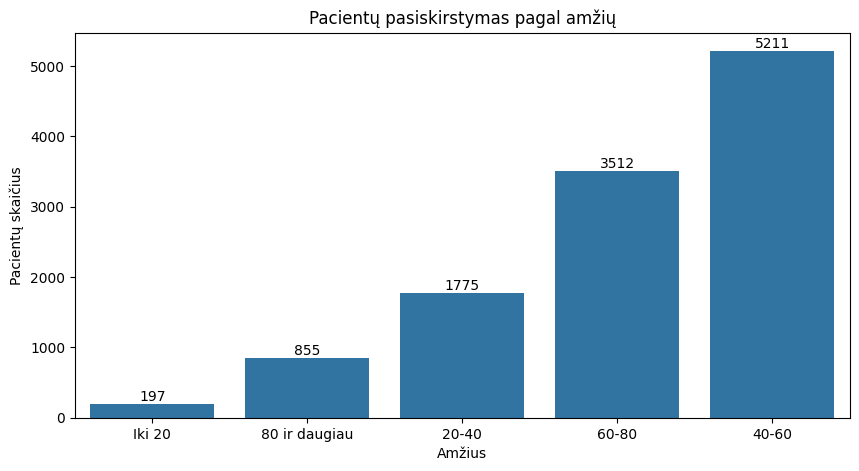

In [16]:
df_for_plot = df_analyse[['paciento_lytis', 'Amžiaus grupė', 'rukymo_stazas_reiksme', 'alkoholis_reiksme', 'Amžius']].groupby('Amžiaus grupė').count().reset_index().sort_values(by='Amžius')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Amžiaus grupė', y='paciento_lytis', data=df_for_plot, ax=ax)
ax.set_title('Pacientų pasiskirstymas pagal amžių')
ax.set_xlabel('Amžius')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [17]:
# Pastebėjimai:
# Daugiausiai sergančiųjų yra amžiaus grupėje 40-60 metų
# Mažiausiai sergančiųjų yra amžiaus grupėje iki 20 metų

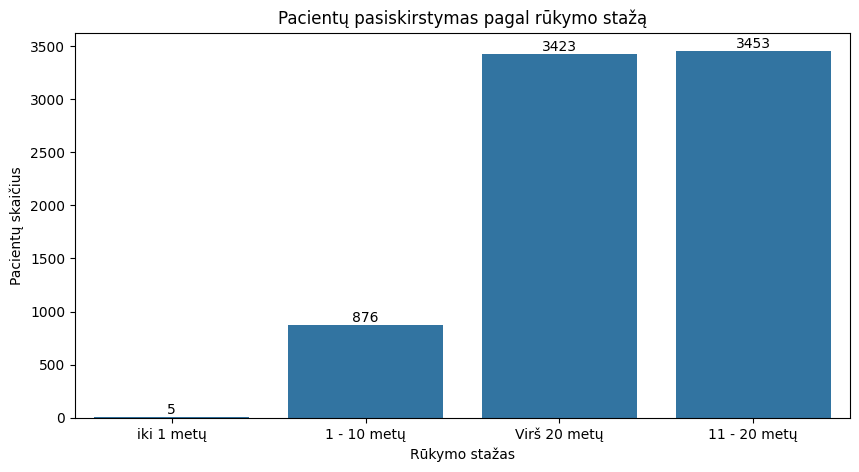

In [18]:
df_for_plot = df_analyse[['paciento_lytis', 'Amžiaus grupė', 'rukymo_stazas_reiksme', 'alkoholis_reiksme', 'Amžius']].groupby('rukymo_stazas_reiksme').count().reset_index().sort_values(by='Amžius')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='rukymo_stazas_reiksme', y='paciento_lytis', data=df_for_plot, ax=ax)
ax.set_title('Pacientų pasiskirstymas pagal rūkymo stažą')
ax.set_xlabel('Rūkymo stažas')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [19]:
# Pastebėjimai:
# Daugiausiai sergančiųjų yra rūkantieji 20 metų ir daugiau
# Mažiausiai sergančiųjų yra rūkantieji iki 5 metų

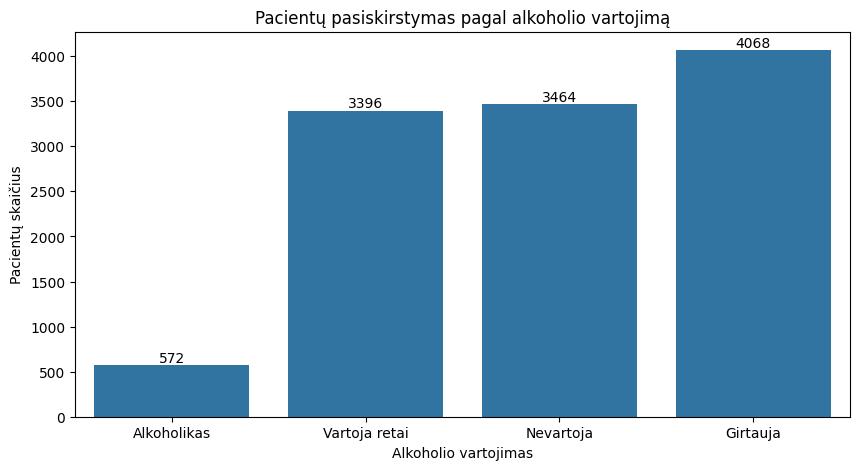

In [20]:
df_for_plot = df_analyse[['paciento_lytis', 'Amžiaus grupė', 'rukymo_stazas_reiksme', 'alkoholis_reiksme', 'Amžius']].groupby('alkoholis_reiksme').count().reset_index().sort_values(by='Amžius')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='alkoholis_reiksme', y='paciento_lytis', data=df_for_plot, ax=ax)
ax.set_title('Pacientų pasiskirstymas pagal alkoholio vartojimą')
ax.set_xlabel('Alkoholio vartojimas')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [21]:
# Pastebėjimai:
# Daugiausiai sergančiųjų yra vartojantieji alkoholį
# Mažiausiai sergančiųjų yra alkoholio vartojantieji iki 5 metų

In [22]:
df_analyse

,paciento_gim_metai,paciento_lytis,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,vda_ligos_kodai,ligos_kodas,ar_mire_nuo_tub,mirties_nuo_tub_d,mirties_data,gimimo_data,Amžius,Amžiaus grupė
0,1978-01-01,M,2.0,11-20 cigarečių per dieną,3.0,11 - 20 metų,1.0,Nevartoja,A15d,A15d,NaN,2025-01-27,2025-01-27,1978-01-01,47,40-60
1,1967-01-01,V,4.0,Nerūko,0.0,NaN,2.0,Vartoja retai,A19.1,A19.1,NaN,2025-01-27,2025-01-27,1967-01-01,58,40-60
5,1924-01-01,V,4.0,Nerūko,NaN,NaN,2.0,Vartoja retai,A15,A15,True,2003-05-01,2003-05-01,1924-01-01,79,60-80
6,1994-01-01,V,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A15.1,A15.1,NaN,2025-01-27,2025-01-27,1994-01-01,31,20-40
11,1985-01-01,V,2.0,11-20 cigarečių per dieną,2.0,1 - 10 metų,2.0,Vartoja retai,A16;A15,A15,True,2012-04-14,2012-04-14,1985-01-01,27,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52102,1952-01-01,V,3.0,Virš 20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,A15d;A15d,A15d,NaN,2025-01-27,2025-01-27,1952-01-01,73,60-80
52115,1946-01-01,V,3.0,Virš 20 cigarečių per dieną,4.0,Virš 20 metų,4.0,Alkoholikas,A19,A19,True,2001-04-24,2001-04-24,1946-01-01,55,40-60
52122,1953-01-01,V,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A18.1,A18.1,NaN,2025-01-27,2025-01-27,1953-01-01,72,60-80
52126,1935-01-01,M,4.0,Nerūko,0.0,NaN,1.0,Nevartoja,A15;A15.1,A15.1,NaN,2025-01-27,2025-01-27,1935-01-01,90,80 ir daugiau


In [23]:
df_for_learn = df_analyse

In [27]:
df_for_learn = df_analyse
df_for_learn = df_for_learn.drop(columns=['paciento_gim_metai', 'rukymas_id', 'rukymo_stazas_id', 'alkoholis_id','vda_ligos_kodai', 'ar_mire_nuo_tub', 'mirties_nuo_tub_d', 'mirties_data', 'gimimo_data', 'Amžiaus grupė'])
df_for_learn['paciento_lytis1'] = LabelEncoder().fit_transform(df_for_learn['paciento_lytis'])
df_for_learn['rukymas_reiksme1'] = LabelEncoder().fit_transform(df_for_learn['rukymas_reiksme'])
df_for_learn['rukymo_stazas_reiksme1'] = LabelEncoder().fit_transform(df_for_learn['rukymo_stazas_reiksme'])
df_for_learn['alkoholis_reiksme1'] = LabelEncoder().fit_transform(df_for_learn['alkoholis_reiksme'])
df_for_learn['ligos_kodas1'] = LabelEncoder().fit_transform(df_for_learn['ligos_kodas'])



In [35]:
df_ml = df_for_learn
df_lytis = dict(zip(df_for_learn['paciento_lytis'],df_for_learn['paciento_lytis1']))
df_rukymas = dict(zip(df_for_learn['rukymas_reiksme'],df_for_learn['rukymas_reiksme1']))
df_rukymo_stazas = dict(zip(df_for_learn['rukymo_stazas_reiksme'],df_for_learn['rukymo_stazas_reiksme1']))
df_alkoholis = dict(zip(df_for_learn['alkoholis_reiksme'],df_for_learn['alkoholis_reiksme1']))
df_liga = dict(zip(df_for_learn['ligos_kodas'],df_for_learn['ligos_kodas1']))
X = df_ml[['paciento_lytis1', 'rukymas_reiksme1', 'rukymo_stazas_reiksme1', 'alkoholis_reiksme1', 'ligos_kodas1']]
y = df_ml['Amžius']

In [36]:
random = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X, y)

In [37]:
decision = DecisionTreeRegressor( random_state=42).fit(X, y)

In [39]:
rep = True
if rep:
    try:
        rep = True
        x = np.nan
        y = np.nan
        lytis = np.nan
        rukymas = np.nan     
        rukymo_stazas = np.nan
        alkoholis = np.nan
        liga = np.nan
        i = input(f'Įveskite vieną iš lyčių, variantai: {list(set(df_lytis.keys()))}')
        lytis = df_lytis[i]
        print(i, lytis)
        s = input(f'Įveskite vieną iš rūkymo variantų, variantai: {list(set(df_rukymas.keys()))}')
        rukymas = df_rukymas[s]
        print(s, rukymas)
        p = input(f'Įveskite vieną iš rūkymo stažo variantų, variantai: {list(set(df_rukymo_stazas.keys()))}')
        rukymo_stazas = df_rukymo_stazas[p]
        print(p, rukymo_stazas)
        r = input(f'Įveskite vieną iš alkoholio variantų, variantai: {list(set(df_alkoholis.keys()))}')
        alkoholis = df_alkoholis[r]
        print(r, alkoholis)
        rep = False
    except Exception as e:
        print(e)
    
x = random.predict(np.reshape([lytis,rukymas, rukymo_stazas, alkoholis, liga], (1,-1)))[0]
y = decision.predict(np.reshape([lytis,rukymas, rukymo_stazas, alkoholis, liga], (1,-1)))[0]
print(f'Random forest spėjimas: {round(x)} metai')
print(f'Decision tree spėjimas: {round(y)} metai')

V 1
11-20 cigarečių per dieną 0
1 - 10 metų 0
Girtauja 1
Random forest spėjimas: 40 metai
Decision tree spėjimas: 40 metai


In [ ]:
# Viena užduotis maždaug vienai paskaitai. Techniniai
# reikalavimai – Jupyter Notebook’as arba Streamlit
# aplinka. Grafikai turi turėti pavadinimus, ašys pavadintos
# prasmingai, jei grafike yra daugiau nei viena kreivė – legenda
# būtina. Panaudoti boxplot, swarmplot, heatmap,
# pairplot, (h)bar, histogram, scatter.
# Būtina pasirašyti 1 – 2 sakinius į JupyterNotebook’ą apie
# tai, ką matote, ką galite pasakyti iš grafiko (ką matote grafike,
# 1-2 sakiniai vienam grafikui, tad jei turėsite 10 grafikų – 20
# sakinių).
# 4


# https://data.gov.lt/datasets/2700/ --- DĖMESIO! Daug duomenų! Pasiūlymas - pagrįstai išsirinkti dalį įrašų !
# Remdamiesi pateikiamais pacientų
# laboratorinių tyrimų rez., įvertinkite tirtųjų asmenų imtį:
# kiek vyrų, moterų, kokio amžiaus, kokių amžiaus grupių, bendra
# sveikatos būklė kiekvienoje grupėje., kuriame regione buvo
# sveikiausi/ligočiausi asmenys. Parašykite skriptą, kuris iš
# vartotojo pateiktų duomenų įvertintų, palygintų šio vartotojo sveikatos būklę su atitinkamos
# grupės žmonių sveikatos būkle.

In [91]:
druskininkai = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/kraujo_tyrimai/DruskininkuLigonine.csv')
druskininkai['Regionas'] = 'Druskininkai'
pasvalys = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/kraujo_tyrimai/SventoRokoLigonine.csv')
pasvalys['Regionas'] = 'Pasvalys'
kedainiai = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/kraujo_tyrimai/KedainiuLigonine.csv')
kedainiai['Regionas'] = 'Kėdainiai'
df_tyrimai = pd.concat([druskininkai, pasvalys, kedainiai])

In [92]:
df_tyrimai['paciento_gimimo_metai'] = pd.to_datetime(df_tyrimai['paciento_gimimo_metai'], format='%Y-%m-%d')
df_tyrimai['tyrimo_data'] = pd.to_datetime(df_tyrimai['tyrimo_data'], format='%Y-%m-%d')
df_tyrimai['Amžius'] = df_tyrimai['tyrimo_data'].dt.year - df_tyrimai['paciento_gimimo_metai'].dt.year
df_tyrimai['Amžiaus grupė'] = df_tyrimai['Amžius'].apply(lambda x: '     Iki 20' if x < 20 else '    20-40' if x < 40 else '   40-60' if x < 60 else '  60-80' if x < 80 else ' 80 ir daugiau')
df_tyrimai['Kodas'] = df_tyrimai['paciento_diagnozes_tlk_10_am_kodas'].apply(lambda x: str(x)[0] if x!=None else None)

In [52]:
df_tyrimai.head()

,_type,_id,_revision,_page.next,vda_prime_key,istaigos_pav,paciento_id,paciento_lytis,paciento_gimimo_metai,tyrimo_grupe,...,tyrimo_meginio_tipas,tyrimo_analite,analites_loinc_kodas,analites_rezultatas,analites_norma_nuo,analites_norma_iki,matavimo_vienetas,paciento_diagnozes_tlk_10_am_kodas,paciento_diagnoze,Regionas
0,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,07bd42e8-d065-4e36-ae6e-be6dc83549e1,431d2f6e-69c6-4248-9f96-2f6d30aea31d,NaN,00000f5e2cbc442,Druskininkų ligoninė,e1487f1674660ef,V,1951-01-01,Biochemija,...,Serumas,Gliukozė serume (GLU S),14749-6,11.0,3.1,6.1,mmol/l,G54,Nervų šaknelių ir rezginių sutrikimai,Druskininkai
1,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,50de4e34-f0fa-44d8-af89-5a38c389c253,bb39d023-6e88-4ca4-8eb0-462fb656159a,NaN,00001673eb1506e,Druskininkų ligoninė,51b60f7a0a03b18,V,1955-01-01,Biochemija,...,Serumas,Kalis (K),2823-3,4.0,3.5,5.3,mmol/l,R07.4,"Krūtinės skausmas, nepatikslintas",Druskininkai
2,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,21194722-b1bb-47db-9831-0543f654b9b9,7f89069b-3b5e-461e-905a-1883a3ca4f2d,NaN,000053566b864d5,Druskininkų ligoninė,7333e24b34539c5,V,1957-01-01,Imunologija,...,Serumas,Karcinoembrioninis antigenas (CEA),32294-1,4.0,0.0,5.1,ng/ml,Z00,"Asmenų, neturinčių nusiskundimų ar nustatytos ...",Druskininkai
3,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,93ea7f22-5e0c-41b7-bd42-18da569a1fe8,463a79eb-062c-4cc4-bdf8-296748d88cec,NaN,00005ef3de56edd,Druskininkų ligoninė,7029ac3c3a380c3,M,1943-01-01,Biochemija,...,Serumas,C reaktyvinis baltymas (CRB),1988-5,10.0,0.0,5.0,mg/l,Z00.0,Bendras medicininis ištyrimas,Druskininkai
4,datasets/gov/lab_tyrimai/lab_tyrimai/Druskinin...,d20d014e-0177-40ce-9731-e6a07503d6a3,c71b37c5-07f2-46fc-a3c9-82dcb2513370,NaN,0000800a2ee7cfe,Druskininkų ligoninė,f3806f027650a1d,V,1966-01-01,Biochemija,...,Plazma,Aktyvintas dalinis tromboplastino laikas (ADTL),3173-2,33.0,30.0,45.0,s,E11.65,"2 tipo cukrinis diabetas, blogai kontroliuojamas",Druskininkai


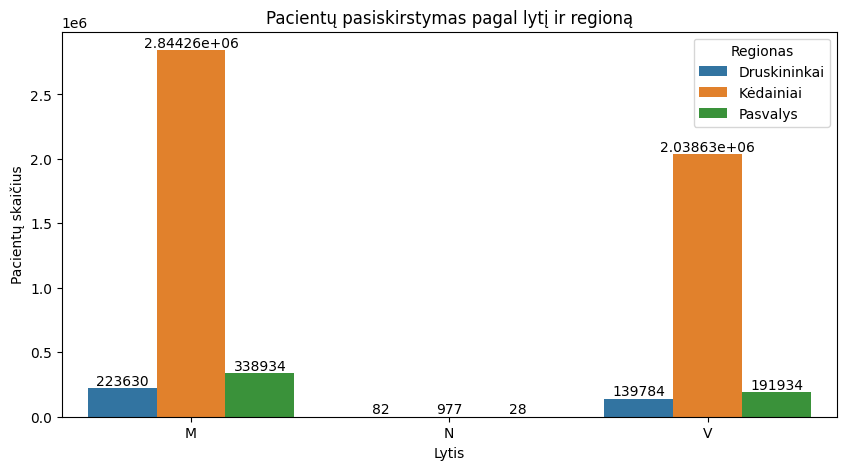

In [93]:
df_for_plots = df_tyrimai.groupby(['Regionas', 'paciento_lytis']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='paciento_lytis', y='_revision', data=df_for_plots, ax=ax, hue='Regionas')
ax.set_title('Pacientų pasiskirstymas pagal lytį ir regioną')
ax.set_xlabel('Lytis')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai:
# 1. Moterų sergamumas didesnis nei vyrų.
# 2. Lyginant Kėdainius, Druskininkus ir Pasvalį Kėdainiuose sergamumas didžiausias.

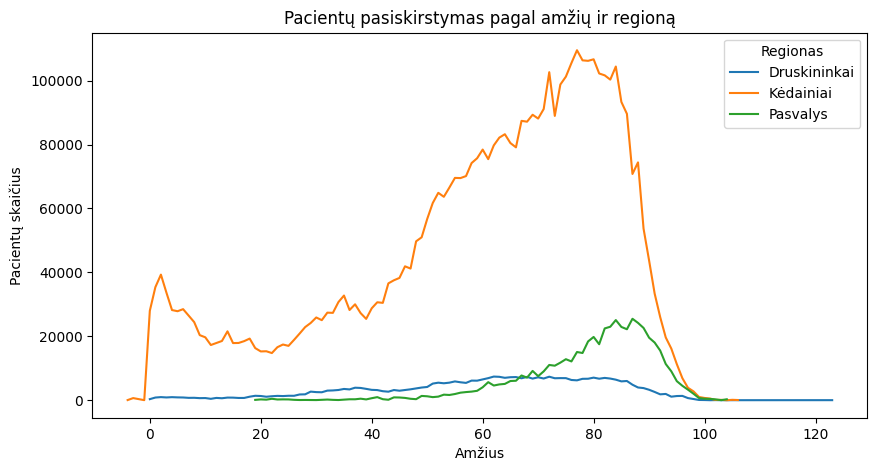

In [94]:
df_for_plots = df_tyrimai.groupby(['Regionas', 'Amžius']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(x='Amžius', y='_revision', data=df_for_plots, ax=ax, hue='Regionas')
ax.set_title('Pacientų pasiskirstymas pagal amžių ir regioną')
ax.set_xlabel('Amžius')
ax.set_ylabel('Pacientų skaičius')
plt.show()

In [ ]:
# Pastebėjimai:
# 1. Didžiausias sergamums mažamečių vaikų ir suaugusių nuo 70 metų.
# 2. Druskininkuose sergamumas mažas ir panašus bet kokio amžiaus žmonėms.

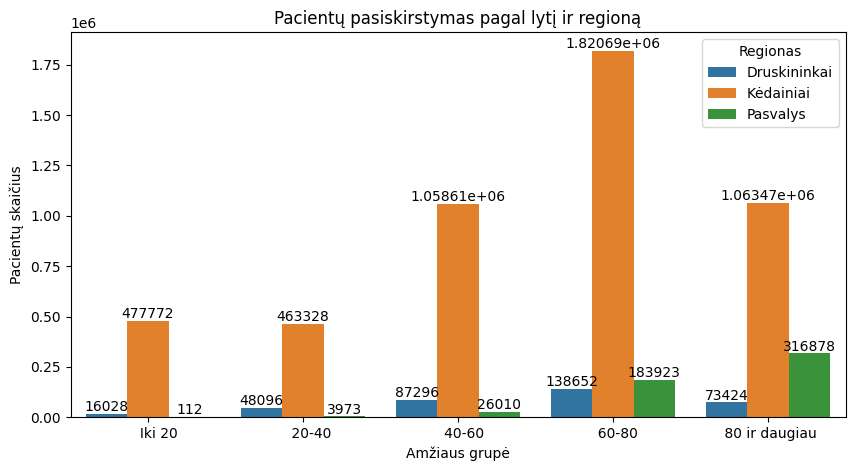

In [95]:
df_for_plots = df_tyrimai.groupby(['Regionas', 'Amžiaus grupė']).count().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='Amžiaus grupė', y='_revision', data=df_for_plots, ax=ax, hue='Regionas')
ax.set_title('Pacientų pasiskirstymas pagal lytį ir regioną')
ax.set_xlabel('Amžiaus grupė')
ax.set_ylabel('Pacientų skaičius')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai:
# 1. Didžiausio sergamumo grupė yra tarp 60 ir 80 metų.
# 2. taip pat dominuoja grupės 40-60 ir virš 80 metų.

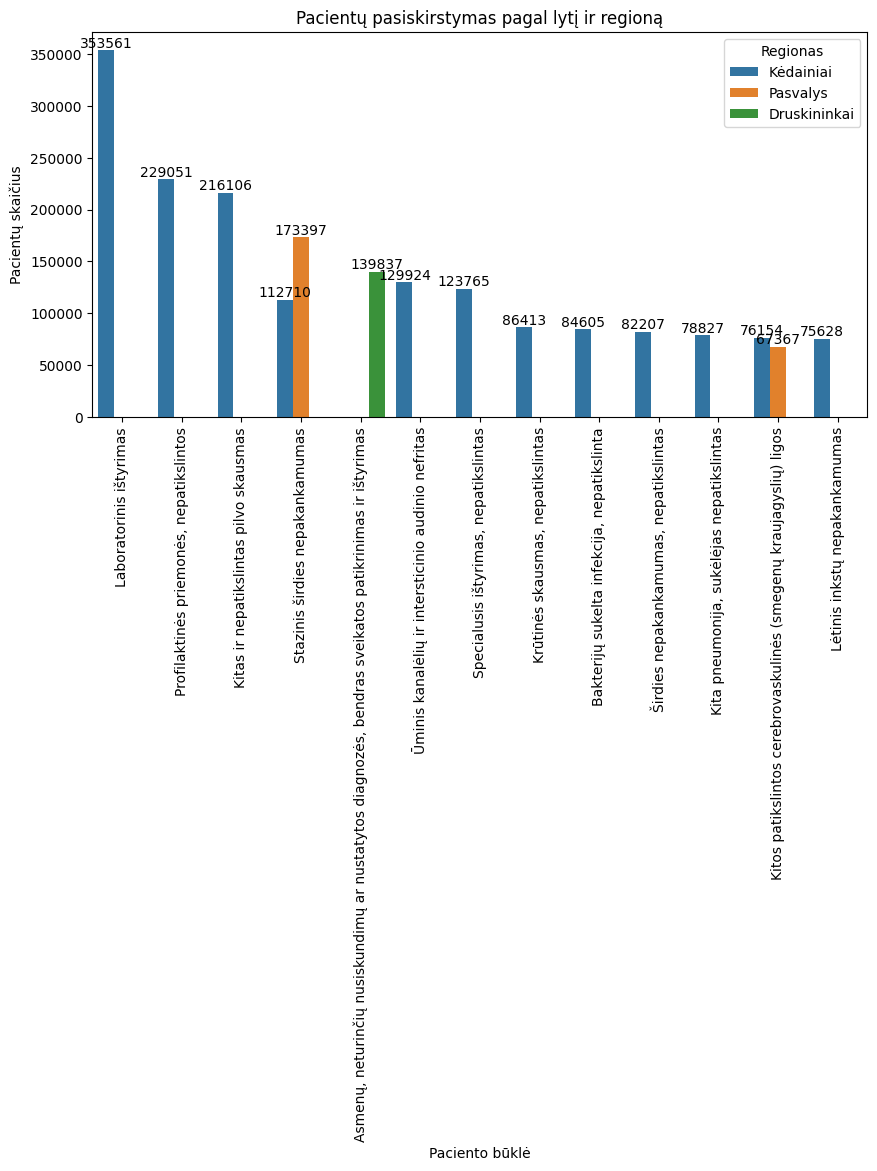

In [96]:
df_for_plots = df_tyrimai.groupby(['Regionas', 'paciento_diagnoze']).count().reset_index().sort_values(by='_revision', ascending=False)[:15]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(x='paciento_diagnoze', y='_revision', data=df_for_plots, ax=ax, hue='Regionas')
ax.set_title('Pacientų pasiskirstymas pagal lytį ir regioną')
ax.set_xlabel('Paciento būklė')
ax.set_ylabel('Pacientų skaičius')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.set(xlabel='Kėbulo tipas',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# Pastebėjimai:
# 1. Daugiausiai tyrimų daroma profilaktiškai
# 2. Taip pat dominuoja ligoniai su diagnoze dėl pilvo skausmo arba širdies nepakankamumo.

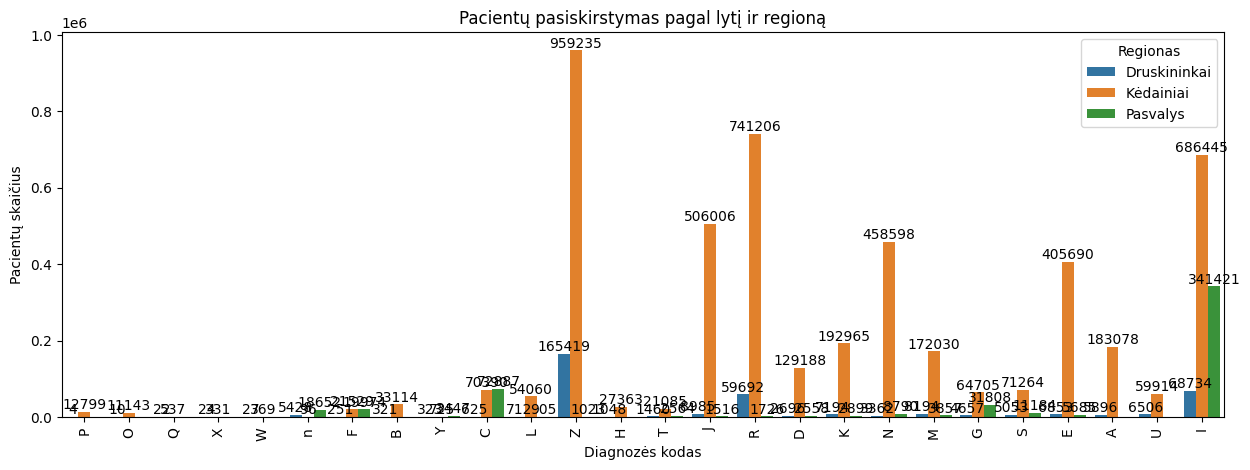

In [97]:
df_for_plots = df_tyrimai.groupby(['Regionas', 'Kodas']).count().reset_index().sort_values(by='_revision', ascending=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.barplot(x='Kodas', y='_revision', data=df_for_plots, ax=ax, hue='Regionas')
ax.set_title('Pacientų pasiskirstymas pagal lytį ir regioną')
ax.set_xlabel('Diagnozės kodas')
ax.set_ylabel('Pacientų skaičius')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.set(xlabel='Kėbulo tipas',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [102]:
# Pastebėjimai:
# 1. Kėdainiuose daugiausiai Z ir R diagnozės pacientų
# 2. Vertinant diagnozę visuose miestuose daugiausiai sergančių yra I diagnozės pacientai
df_tyrimai[df_tyrimai['Kodas'] == 'I'][['Kodas', 'paciento_diagnoze']].groupby('paciento_diagnoze').count().sort_values(by='Kodas',ascending=False)[:10]
# 3. I daignozės vyrauja širdies ar kraujagyslių ligų

,Kodas
paciento_diagnoze,
Stazinis širdies nepakankamumas,288368
Kitos patikslintos cerebrovaskulinės (smegenų kraujagyslių) ligos,144499
"Širdies nepakankamumas, nepatikslintas",84779
Hipertenzinė širdies liga be širdies nepakankamumo (stazinio),61442
Smegenų infarktas dėl nepatikslinto smegenų arterijų užsikimšimo arba susiaurėjimo,59247
Širdies nepakankamumas,58092
Smegenų infarkto pasekmės,49094
Kitos krūtinės anginos formos,48546
Paroksizminis prieširdžių virpėjimas,39559


In [77]:
df_tyrimai.columns

Index(['_type', '_id', '_revision', '_page.next', 'vda_prime_key',
       'istaigos_pav', 'paciento_id', 'paciento_lytis',
       'paciento_gimimo_metai', 'tyrimo_grupe', 'tyrimo_data',
       'tyrimo_meginio_tipas', 'tyrimo_analite', 'analites_loinc_kodas',
       'analites_rezultatas', 'analites_norma_nuo', 'analites_norma_iki',
       'matavimo_vienetas', 'paciento_diagnozes_tlk_10_am_kodas',
       'paciento_diagnoze', 'Regionas', 'Amžius', 'Amžiaus grupė', 'Kodas'],
      dtype='object')

In [89]:
# Funkcija analizei atlikti
def analizuoti_duomenis(df, amzius, tyrimo_analite, analites_rezultatas):
    # Filtruojame duomenis pagal nurodytą analitę
    analite_df = df[df['tyrimo_analite'] == tyrimo_analite]

    if analite_df.empty:
        print("Nėra duomenų pasirinktam tyrimo analitei.")
        return

    # Filtruojame pagal amžiaus intervalą (jei reikia daugiau amžiaus kategorijų, pritaikykite logiką)
    artimiausi_amziai = analite_df.loc[analite_df['Amžius'] == amzius]

    # Patikriname, kiek pacientų turi tokį patį rezultatą
    toks_pats_rezultatas = artimiausi_amziai[artimiausi_amziai['analites_rezultatas'] == analites_rezultatas]

    procentas_toks_pats = (len(toks_pats_rezultatas) / len(artimiausi_amziai) * 100) if len(artimiausi_amziai) > 0 else 0

    # Analizė pagal normų ribas
    virs_normos = analites_rezultatas > artimiausi_amziai['analites_norma_iki'].mean()
    zemiau_normos = analites_rezultatas < artimiausi_amziai['analites_norma_nuo'].mean()

    # Apskaičiuojame procentą pacientų, kurie yra žemiau, normos ribose ar virš normos
    zemiau_procentas = (len(artimiausi_amziai[artimiausi_amziai['analites_rezultatas'] < analites_rezultatas]) / len(artimiausi_amziai) * 100) if len(artimiausi_amziai) > 0 else 0
    normoje_procentas = (len(artimiausi_amziai[(artimiausi_amziai['analites_rezultatas'] >= artimiausi_amziai['analites_norma_nuo']) & 
                                                (artimiausi_amziai['analites_rezultatas'] <= artimiausi_amziai['analites_norma_iki'])]) / len(artimiausi_amziai) * 100) if len(artimiausi_amziai) > 0 else 0
    virs_procentas = 100 - zemiau_procentas - normoje_procentas

    bukle = "Normalus"  # Pradinė būklė
    if virs_normos:
        bukle = "Virš normos"
    elif zemiau_normos:
        bukle = "Žemiau normos"

    # Diagnozių analizė
    diagnozes = toks_pats_rezultatas['paciento_diagnoze'].unique() if 'paciento_diagnoze' in toks_pats_rezultatas else []

    # Rezultatų išvedimas
    print("Palyginimo rezultatai: \n")
    print(f"Procentas pacientų, turinčių tokį patį rezultatą: {procentas_toks_pats:.2f}% \n")

    print(f"Jūsų analitės rezultatas yra: {bukle} \n")

    print("Jūs patenkate į šias grupes:")
    print(f"{zemiau_procentas:.2f}% pacientų žemiau rezultato")
    print(f"{normoje_procentas:.2f}% normos ribose")
    print(f"{virs_procentas:.2f}% virš rezultato \n")

    if diagnozes.size > 0:
        print("Diagnozės su tokiu pačiu rezultatu:")
        print("\n".join(map(str, diagnozes)))
    else:
        print("Nėra diagnozių duomenų tokiam rezultatui.")


In [90]:
analizuoti_duomenis(df=df_tyrimai, amzius=32, tyrimo_analite='Kalis  (K)', analites_rezultatas=4)

Palyginimo rezultatai: 

Procentas pacientų, turinčių tokį patį rezultatą: 69.09% 

Jūsų analitės rezultatas yra: Normalus 

Jūs patenkate į šias grupes:
1.82% pacientų žemiau rezultato
97.09% normos ribose
1.09% virš rezultato 

Diagnozės su tokiu pačiu rezultatu:
Asmenų, neturinčių nusiskundimų ar nustatytos diagnozės, bendras sveikatos patikrinimas ir ištyrimas
Kodo U07.1 naudojimas nenumatytu atveju
Pilvo ir dubens skausmas
Kiti pilvo, nugaros apatinės dalies ir dubens paviršiniai sužalojimai, sumušimai
Kitas ūminis gastritas
Karščiavimas, nepatikslintas
Bakterijų sukelta infekcija, nepatikslinta
Nestabilioji krūtinės angina
Specialus patikrinimas dėl kitų virusinių ligų
Apalpimas ir kolapsas
Svaigulys ir galvos sukimasis
Galvos skausmas
Krūtinės angina
Inksto dieglys, nepatikslintas
Strėnų gėla (lumbago) su sėdimojo nervo neuralgija
Nepatikslintos srities odos abscesas (pūlinys), furunkulas (šunvotė) ir karbunkulas (piktvotė)
Negalavimas ir nuovargis
Hipotenzija
Sėklidės užsisukim